# Pumpkin Price Prediction Tutorial

In this folder you will find a .csv file in the root `data` folder called [US-pumpkins.csv](https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/data/US-pumpkins.csv) which includes 1757 lines of data about the market for pumpkins, sorted into groupings by city. This is raw data extracted from the [Specialty Crops Terminal Markets Standard Reports](https://www.marketnews.usda.gov/mnp/fv-report-config-step1?type=termPrice) distributed by the United States Department of Agriculture.


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pumpkins = pd.read_csv('C:/Users/michn/OneDrive/Other/Programming/GitHub/ML-For-Beginners/2-Regression/data/US-pumpkins.csv')
pumpkins.head() #view the first 5 rows
pumpkins.tail() #view the last 5 rows

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.
1756,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/29/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,"MINIATURE LOWER, OTHERS STEADY."


You will first need to take steps to check for missing dates:

1. Convert the dates to a month format (these are US dates, so the format is `MM/DD/YYYY`).
2. Extract the month to a new column.


In [64]:
pumpkins['Month'] = pd.to_datetime(pumpkins['Date'], format='%m/%d/%y').dt.month

In [65]:
# We are going to check if there is missing data in the current dataframe

pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
Month                 0
dtype: int64

To make your dataframe easier to work with, drop several of its columns, using `drop()`, keeping only the columns you need:

In [66]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
pumpkins.head()
pumpkins.tail()
pumpkins.isnull().sum()

Package       0
Date          0
Low Price     0
High Price    0
Month         0
dtype: int64

Now we are going to determine the average price of a pumpkin in a given month. Hence, make an average of the high and low.

In [67]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
price.head()

0    275.0
1    275.0
2    160.0
3    160.0
4     95.0
dtype: float64

In [68]:
month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Int64Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=1757)


Now, copy your converted data into a fresh Pandas dataframe:

In [69]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


If you look at the `Package` column, pumpkins are sold in many different configurations. Some are sold in '1 1/9 bushel' measures, and some in '1/2 bushel' measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

> Pumpkins seem very hard to weigh consistently

Digging into the original data, it's interesting that anything with `Unit of Sale` equalling 'EACH' or 'PER BIN' also have the `Package` type per inch, per bin, or 'each'. Pumpkins seem to be very hard to weigh consistently, so let's filter them by selecting only pumpkins with the string 'bushel' in their `Package` column.

In [70]:
#Add a filter at the top of the file, under the initial .csv import:

pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

Did you notice that the bushel amount varies per row? You need to normalize the pricing so that you show the pricing per bushel, so do some math to standardize it.

In [71]:
pumpkins['Month'] = pd.to_datetime(pumpkins['Date'], format='%m/%d/%y').dt.month
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})

#Adding in these lines after the block creating the new_pumpkins dataframe:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


Now we are going to use Matplotlib to visual the data.

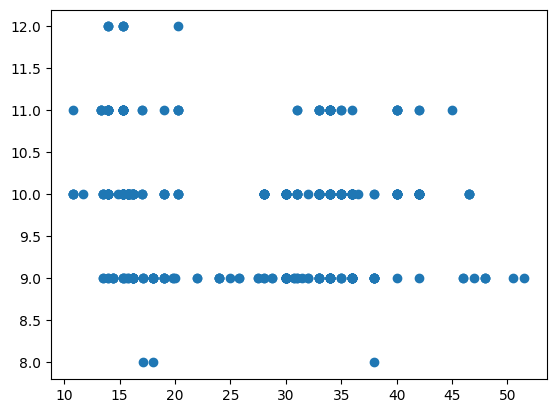

In [72]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

To get charts to display useful data, you usually need to group the data somehow. Let's try creating a plot where the y axis shows the months and the data demonstrates the distribution of data.

Text(0, 0.5, 'Pumpkin Price')

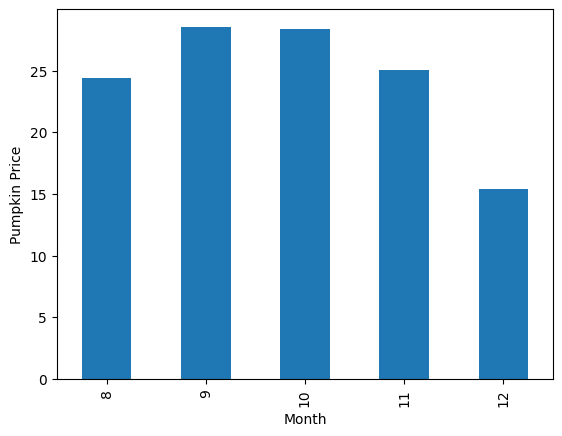

In [73]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

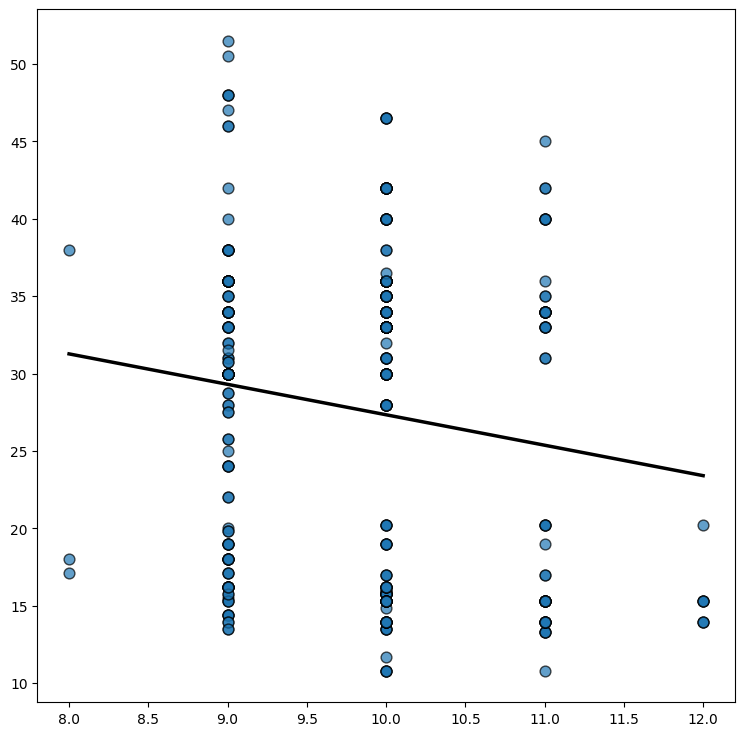

In [82]:
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(new_pumpkins['Month'], new_pumpkins['Price'], s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(new_pumpkins['Month'], new_pumpkins['Price'], deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(8, 12, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

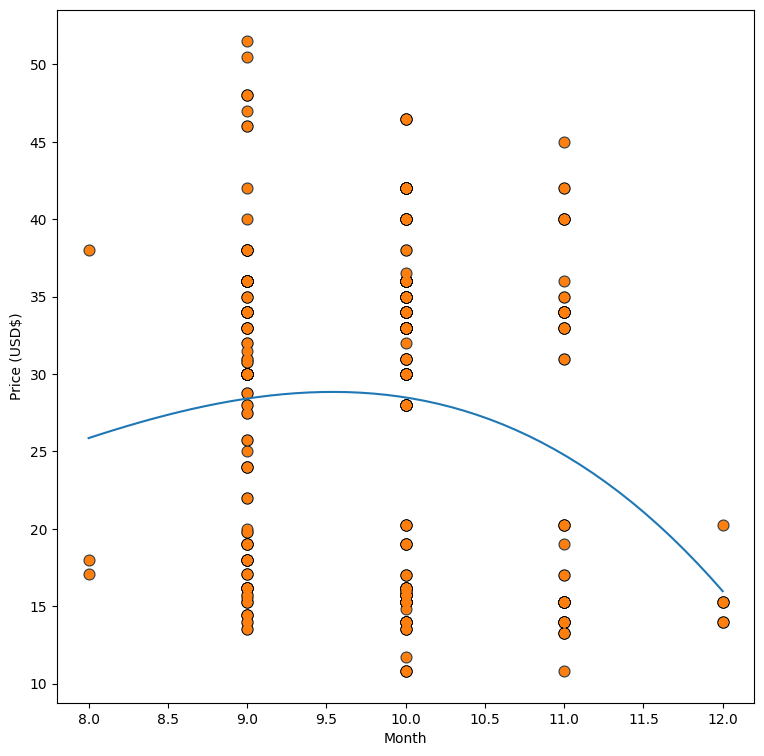

In [92]:
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(new_pumpkins['Month'], new_pumpkins['Price'], s=60, alpha=0.7, edgecolors="k")

#fit cubic regression model
model = np.poly1d(np.polyfit(new_pumpkins['Month'], new_pumpkins['Price'], 3))

#add fitted cubic regression line to scatterplot
polyline = np.linspace(8, 12, 50)
plt.scatter(new_pumpkins['Month'], new_pumpkins['Price'])
plt.plot(polyline, model(polyline))

#add axis labels
plt.xlabel('Month')
plt.ylabel('Price (USD$)')

#display plot
plt.show()